### A Linear Mean-RevertingTrading Strategy

Once we determine that a price series is mean reverting, and that the half- life of mean reversion for a price series short enough for our trading horizon, we can easily trade this price series profitably using a simple linear strategy: determine the normalized deviation of the price (moving standard deviation divided by the moving standard deviation of the price) from its moving average, and maintain the number of units in this asset negatively proportional to this normalized deviation. The look-back for the moving average and standard deviation can be set to equal the half-life. We see in Example 2.5 how this linear mean reversion works for USD.CAD.

You might wonder why it is necessary to use a moving average or standard deviation for a mean-reverting strategy at all. If a price series is stationary, shouldn’t its mean and standard deviation be fixed forever? Though we usually assume the mean of a price series to be fixed, in practice it may change slowly due to changes in the economy or corporate management. As for the standard deviation, recall that Equation 2.4 implies even a “stationary” price series with 0 < H < 0.5 has a variance that increases with time, though not as rapidly as a geometric random walk. So it is appropriate to use moving average and standard deviation to allow ourselves to adapt to an ever-evolving mean and standard deviation, and also to capture profit more quickly. This point will be explored more thoroughly in Chapter 3, particularly in the context of “scaling-in.”

### Example 2.5: Backtesting a Linear Mean-Reverting Trading Strategy

In this simple strategy, we seek to own a number of units of USD.CAD equal to the negative normalized deviation from its moving average. The market value (in USD) of one unit of a currency pair USD.X is nothing but the quote USD.X, so in this case the linear mean reversion is equivalent to setting the market value of the portfolio to be the negative of the Z-Score of USD.CAD.

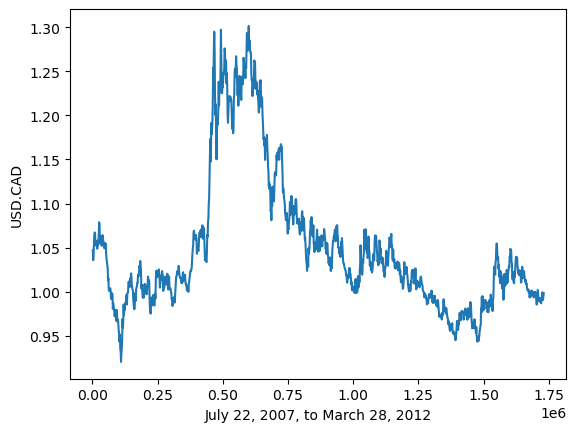

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('inputData_USDCAD.csv')

y=df.loc[df['Time']==1659, 'Close']

plt.xlabel("July 22, 2007, to March 28, 2012")
plt.ylabel("USD.CAD")
plt.plot(y)

**FIGURE 2.2** USD.CAD Price Series

In [2]:
# Calculated from Example 2.4
halflife = 115.2097944851546

In [3]:
# Apply a simple linear mean reversion strategy to USDCAD
lookback = round(halflife)
# capital in number of shares invested in USDCAD
mktVal = -(y - y.rolling(lookback).mean()) / y.rolling(lookback).std()
# daily P&L of the strategy
pnl = mktVal.shift(1) * (y - y.shift(1)) / y.shift(1)
pnl = pnl.fillna(0)

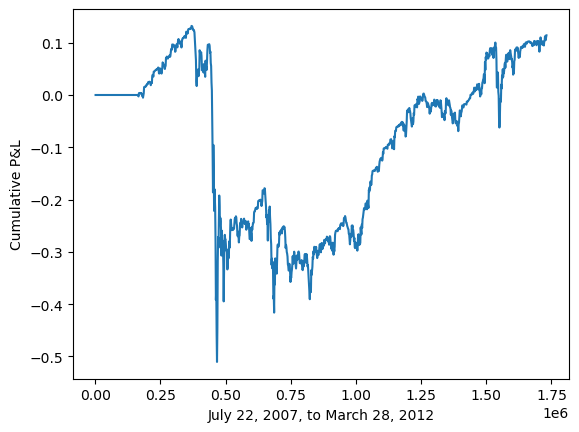

In [4]:
plt.xlabel("July 22, 2007, to March 28, 2012")
plt.ylabel("Cumulative P&L")
plt.plot(np.cumsum(pnl))

**FIGURE 2.3** Equity Curve of LinearTrading Strategy on USDCAD.

Despite the long half-life, the total profit and loss (P&L) manages to be positive, albeit with a large drawdown. As with most example strategies in this book, we do not include transaction costs. Also, there is a look-ahead bias involved in this particular example due to the use of in-sample data to find the half-life and therefore the look- back. Furthermore, an unlimited amount of capital may be needed to generate the P&L because there was no maximum imposed on the market value of the portfolio. So I certainly don’t recommend it as a practical trading strategy. (There is a more practical version of this mean-reverting strategy in Chapter 5.) But it does illustrate that a nonstationary price series need not discourage us from trading a mean reversion strategy, and that we don’t need very complicated strategies or technical indicators to extract profits from a mean-reverting series.